In [13]:
from src.general_methods.visualizer import Visualizer
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import torch
from torch import nn, Tensor

from src.deep.mmodel import mModel, mDataSet

In [15]:
num_epochs = 3
data_dir_path = 'data'

2.0580742359161377


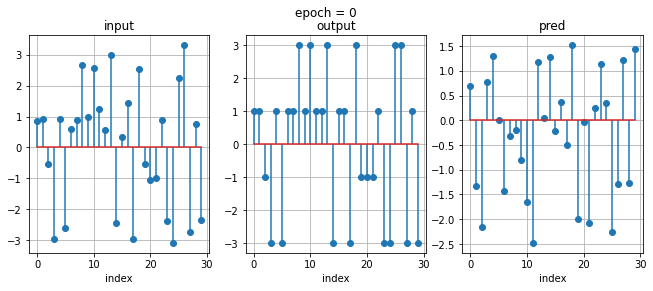

2.084069013595581


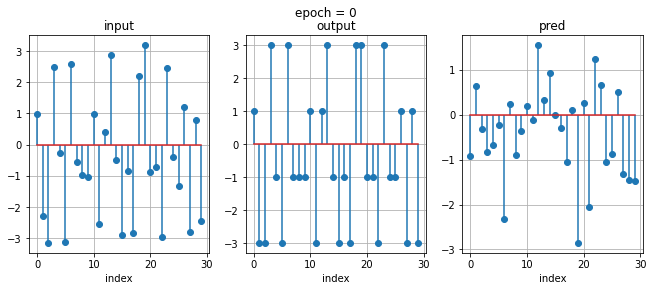

2.0992188453674316


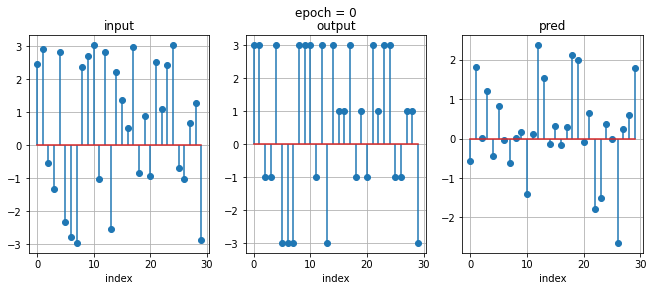

2.19033145904541


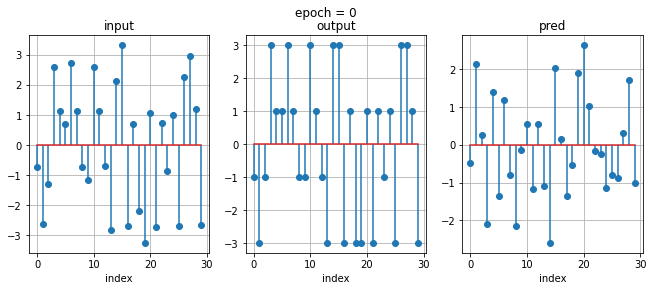

2.119443416595459


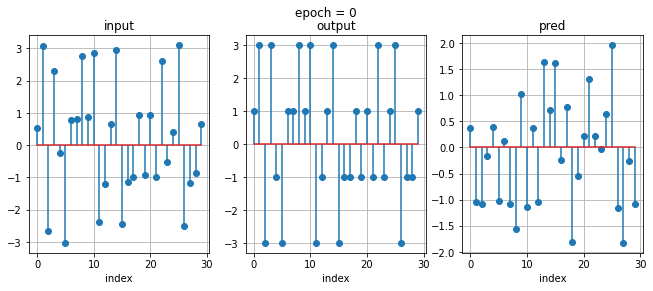

1.1613616943359375


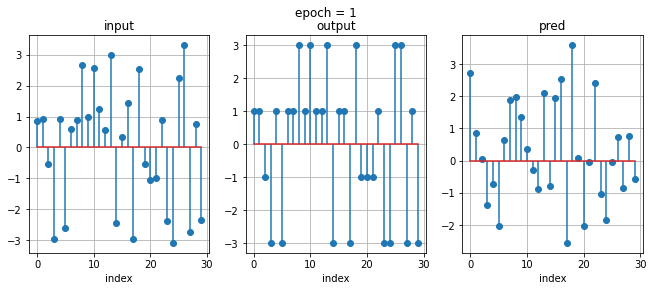

1.2069207429885864


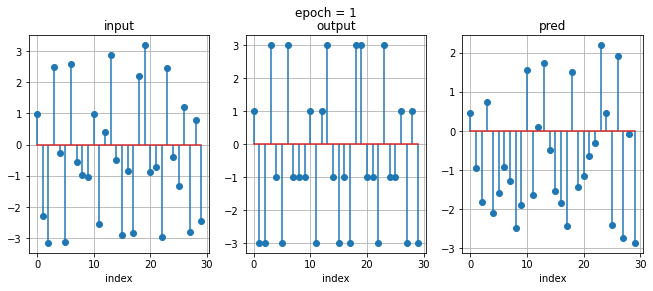

1.2488878965377808


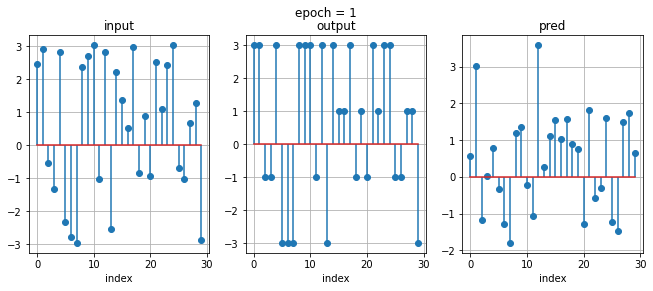

1.4127964973449707


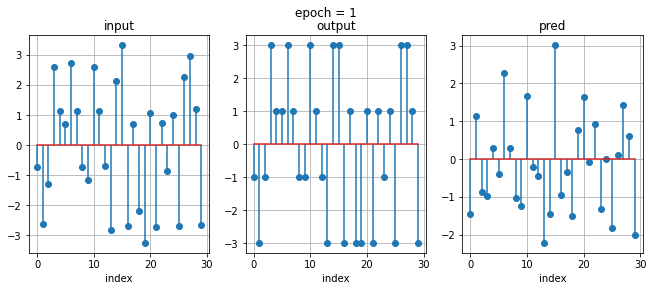

1.423414945602417


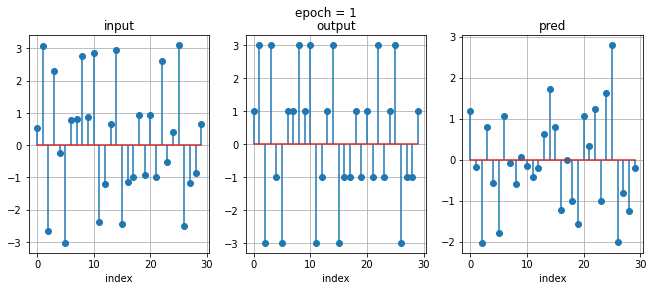

0.7843125462532043


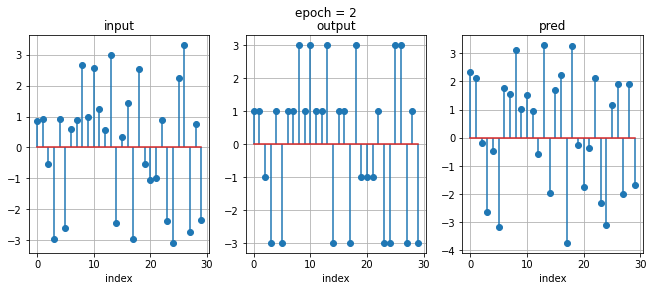

0.7277975678443909


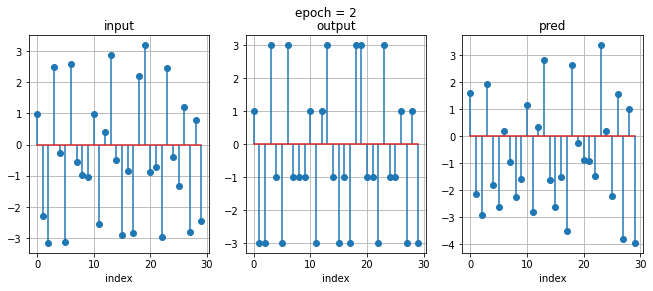

0.7410246729850769


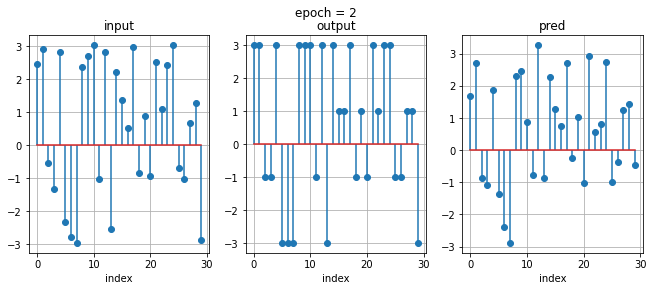

0.8644373416900635


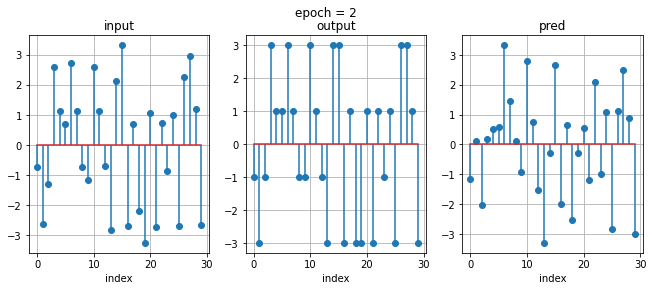

0.8912681341171265


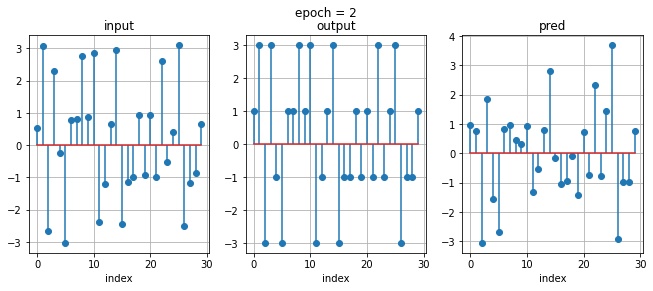

In [18]:
model = mModel()
dataloader = mDataSet(data_dir_path)
l_metric = nn.L1Loss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(num_epochs):
    for x, y in dataloader:
        pred = model(x)
        loss: Tensor = l_metric(y, pred)
        optim.zero_grad()
        loss.backward()
        optim.step()
        print(loss.item())
        Visualizer.data_trio_plot(x.detach().numpy(),y.detach().numpy(),pred.detach().numpy(),range(0,30),f'epoch = {epoch}',function='stem')